In this file we will expolore our dataset from "Students" of Drexel students answering the question "What are the student's strengths?"

In [1]:
#Importing necessary libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import math

In [2]:
# Importing datasets and print sheet names
xls = pd.ExcelFile('/Users/otabekjuraev/OneDrive - Sejong University/DREXEL/Courses/MIS/Week 3/dataset/student_data.xlsx')
xls.sheet_names



['Classroom Activities Question',
 'Coursework Question',
 'Most Imp Skills',
 'Skills to develop',
 'What made job interesting',
 'Learn & Focus on']

In [4]:
df = xls.parse('What made job interesting')
df

,Respondent ID,Work Terms,Class (BOT),College Code,Major Code,Coop Conc,Major Conc,Co-op #,Citizenship Status,What would have made this job more interesting to you?
0,11,201415-201425,JR,B,FIN,4COP,NaN,Only,US Citizen,Much less running around to get food. Would ha...
1,29,201415-201425,SR,B,ACCT,4COP,NaN,Only,US Citizen,It was an interesting and fantastic experience.
2,55,201415-201425,JR,B,ACCT,5COP,NaN,Third,US Citizen,NaN
3,61,201425-201425,JR,B,BAE,5COP,NaN,Second,Non US Citizen,If I had been interested in cars in the first ...
4,60,201415-201415,JR,B,BAE,5COP,NaN,Second,Non US Citizen,If I could interact more and do something as a...
...,...,...,...,...,...,...,...,...,...,...
1423,5921,201435-201445,JR,B,GBUS,4COP,NaN,Only,US Citizen,Wegmans is a very interesting place. I had the...
1424,5922,201435-201435,JR,B,MKTG,5COP,NaN,First,Non US Citizen,If I was able to spend more time working on ou...
1425,5932,201435-201445,JR,B,GBUS,4COP,NaN,Only,US Citizen,Not many things. I really enjoy where I work.
1426,5938,201435-201445,PJ,B,GBUS,4COP,NaN,Only,US Citizen,It would have been more interesting to me if I...


In [5]:
# So we have 1429 rows and 10 columns in our dataset.

In [6]:
df.shape

(1428, 10)

In [7]:
# Checking for missing values in columns
df.isnull().sum()

Respondent ID                                                0
Work Terms                                                   0
Class (BOT)                                                  0
College Code                                                 0
Major Code                                                   0
Coop Conc                                                    0
Major Conc                                                1397
Co-op #                                                      0
Citizenship Status                                           0
What would have made this job more interesting to you?      22
dtype: int64

In [9]:
# We have 1397 missing values in "Major Conc" column, since don't neet this data we delete it from our dataframe.
try:
    df.isnull().sum()
    df = df.drop("Major Conc", axis=1)
except:
    print("Completed")


Completed


# Delete rows with missing values

In [10]:
df = df.dropna()

In [12]:
# This is how our target text data looks like. 1419 rows of valid data left
df

,Respondent ID,Work Terms,Class (BOT),College Code,Major Code,Coop Conc,Co-op #,Citizenship Status,What would have made this job more interesting to you?
0,11,201415-201425,JR,B,FIN,4COP,Only,US Citizen,Much less running around to get food. Would ha...
1,29,201415-201425,SR,B,ACCT,4COP,Only,US Citizen,It was an interesting and fantastic experience.
3,61,201425-201425,JR,B,BAE,5COP,Second,Non US Citizen,If I had been interested in cars in the first ...
4,60,201415-201415,JR,B,BAE,5COP,Second,Non US Citizen,If I could interact more and do something as a...
5,66,201415-201425,SR,B,FIN,4COP,Only,US Citizen,Due to lack of space in the office I was assig...
...,...,...,...,...,...,...,...,...,...
1423,5921,201435-201445,JR,B,GBUS,4COP,Only,US Citizen,Wegmans is a very interesting place. I had the...
1424,5922,201435-201435,JR,B,MKTG,5COP,First,Non US Citizen,If I was able to spend more time working on ou...
1425,5932,201435-201445,JR,B,GBUS,4COP,Only,US Citizen,Not many things. I really enjoy where I work.
1426,5938,201435-201445,PJ,B,GBUS,4COP,Only,US Citizen,It would have been more interesting to me if I...


In [13]:
#check for missiing values
df.isnull().sum()

Respondent ID                                             0
Work Terms                                                0
Class (BOT)                                               0
College Code                                              0
Major Code                                                0
Coop Conc                                                 0
Co-op #                                                   0
Citizenship Status                                        0
What would have made this job more interesting to you?    0
dtype: int64

In [14]:
# No missing values in our dataset

# Working on removing contraction words

Before removing all punctuation we will convert contractions into whole words not to lose some information.

"Contractions are a unique type of word that combines two or more other words in a shortened form, 
usually with an apostrophe. Contractions take words that usually go together, 
like can not or I have, and then remove certain letters to shorten them and make other words, like can’t or I’ve." (Source: https://www.grammarly.com/blog/contractions/)

It is useful to keep those word in order to keep sentiment of the sentences.

In [15]:
import contractions

In [16]:
contractions_re=re.compile('(%s)' % '|'.join(contractions.contractions_dict.keys()))

In [17]:
contractions.contractions_dict.keys()

dict_keys(["I'm", "I'm'a", "I'm'o", "I've", "I'll", "I'll've", "I'd", "I'd've", 'Whatcha', "amn't", "ain't", "aren't", "'cause", "can't", "can't've", "could've", "couldn't", "couldn't've", "daren't", "daresn't", "dasn't", "didn't", 'didn’t', "don't", 'don’t', "doesn't", "e'er", "everyone's", 'finna', 'gimme', "gon't", 'gonna', 'gotta', "hadn't", "hadn't've", "hasn't", "haven't", "he've", "he's", "he'll", "he'll've", "he'd", "he'd've", "here's", "how're", "how'd", "how'd'y", "how's", "how'll", "isn't", "it's", "'tis", "'twas", "it'll", "it'll've", "it'd", "it'd've", 'kinda', "let's", 'luv', "ma'am", "may've", "mayn't", "might've", "mightn't", "mightn't've", "must've", "mustn't", "mustn't've", "needn't", "needn't've", "ne'er", "o'", "o'clock", "ol'", "oughtn't", "oughtn't've", "o'er", "shan't", "sha'n't", "shalln't", "shan't've", "she's", "she'll", "she'd", "she'd've", "should've", "shouldn't", "shouldn't've", "so've", "so's", "somebody's", "someone's", "something's", 'sux', "that're", "

In [18]:
dt = contractions.contractions_dict
def update_text(text):
    for key in dt:
        text = re.sub(key, dt[key], text)
    return text

In [19]:
def expand_contractions(text,contractions_dict=contractions.contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

In [21]:
df["What would have made this job more interesting to you?"]

0       Much less running around to get food. Would ha...
1         It was an interesting and fantastic experience.
3       If I had been interested in cars in the first ...
4       If I could interact more and do something as a...
5       Due to lack of space in the office I was assig...
                              ...                        
1423    Wegmans is a very interesting place. I had the...
1424    If I was able to spend more time working on ou...
1425        Not many things. I really enjoy where I work.
1426    It would have been more interesting to me if I...
1427    if she provides me more finance work I would a...
Name: What would have made this job more interesting to you?, Length: 1406, dtype: object

In [23]:
df["processed"] = df["What would have made this job more interesting to you?"].apply(lambda x: update_text(x))
df.sample(10)

,Respondent ID,Work Terms,Class (BOT),College Code,Major Code,Coop Conc,Co-op #,Citizenship Status,What would have made this job more interesting to you?,processed
485,4956,201425-201435,JR,B,ACCT,5COP,Third,US Citizen,"More work after tax season ended, things get k...","More work after tax season ended, things get k..."
1009,2571,201435-201445,PJ,B,ACCT,5COP,First,US Citizen,"Nothing, this job was very interesting and alw...","Nothing, this job was very interesting and alw..."
472,4871,201415-201425,PJ,B,FIN,5COP,Second,US Citizen,More responsibility and less down time.,More responsibility and less down time.
489,5000,201415-201425,SR,B,FIN,5COP,Third,US Citizen,Scheduled meetings with team members,Scheduled meetings with team mthembers
1313,4813,201445-201445,JR,B,ACCT,5COP,Third,US Citizen,"Honestly, nothing, I felt engaged at all times.","Honestly, nothing, I felt engaged at all times."
116,2298,201415-201425,SO,B,MKTG,5COP,First,US Citizen,More creative work would have peaked my intere...,More creative work would have peaked my intere...
804,1272,201435-201445,JR,B,INT1,5COP,Second,US Citizen,"I'm interested in a different line of work, th...","I am interested in a different line of work, t..."
10,109,201415-201425,JR,B,LGST,4COP,Only,Resident Alien Non-Citizen,Further independent research,Further independent research
409,4479,201415-201425,JR,B,BAE,5COP,Third,US Citizen,More onsite interaction with the customers,More onsite interaction with the customers
1162,3571,201435-201445,PJ,B,MKTG,5COP,First,US Citizen,A salary would have made this job more interes...,A salary would have made this job more interes...


# Lowercase the text

In [24]:
df['processed']=df["processed"].apply(lambda x: x.lower())

In [25]:
#checking results
df["processed"]

0       much less running around to get food. would ha...
1         it was an interesting and fantastic experience.
3       if i had been interested in cars in the first ...
4       if i could interact more and do something as a...
5       due to lack of space in the office i was assig...
                              ...                        
1423    wegmans is a very interesting place. i had the...
1424    if i was able to spend more time working on ou...
1425        not many things. i really enjoy where i work.
1426    it would have been more interesting to me if i...
1427    if she provides me more finance work i would a...
Name: processed, Length: 1406, dtype: object

# Remove all digits

In [26]:
df['processed']=df['processed'].apply(lambda x: re.sub('\w*\d\w*','', str(x)))
#checking results
df["processed"]

0       much less running around to get food. would ha...
1         it was an interesting and fantastic experience.
3       if i had been interested in cars in the first ...
4       if i could interact more and do something as a...
5       due to lack of space in the office i was assig...
                              ...                        
1423    wegmans is a very interesting place. i had the...
1424    if i was able to spend more time working on ou...
1425        not many things. i really enjoy where i work.
1426    it would have been more interesting to me if i...
1427    if she provides me more finance work i would a...
Name: processed, Length: 1406, dtype: object

## Remove special characters

In [27]:
df['processed']=df['processed'].apply(lambda x: re.sub('[^A-Za-z0-9]+', ' ', str(x)))

In [28]:
df["processed"]

0       much less running around to get food would hav...
1         it was an interesting and fantastic experience 
3       if i had been interested in cars in the first ...
4       if i could interact more and do something as a...
5       due to lack of space in the office i was assig...
                              ...                        
1423    wegmans is a very interesting place i had the ...
1424    if i was able to spend more time working on ou...
1425         not many things i really enjoy where i work 
1426    it would have been more interesting to me if i...
1427    if she provides me more finance work i would a...
Name: processed, Length: 1406, dtype: object

## Unnecessary words

# Removing punctuations

In [29]:
df['processed'] = df['processed'].apply(lambda i: re.sub('[%s]' % re.escape(string.punctuation), '', str(i)))

In [30]:
#Checking the results
df['processed'].sample(10)

590                              challenging great people
1174    flexible time present my works to the larger a...
1390    i would have enjoyed working with spreadsheets...
147     the job was as interesting as i expected it to...
578     a lil bit more communication between the manag...
201     being able to compare how the supervisor did t...
1029                                           more tasks
927     if i could work with different teams when i ha...
29      less content creation and more data to use for...
1010    getting involved with various projects right f...
Name: processed, dtype: object

# Removing extra spaces between words

In [31]:
df.loc['processed']=df['processed'].apply(lambda i: re.sub(' +',' ',i))

In [32]:
# Checking results
df["processed"].sample(10)

1056    this job requires being at your desk for most ...
808               being in more of a leadership position 
540     i think it would have been a bit more interest...
417     during this job i was able to sit in with anot...
1217    as for me the job meet my expectation it was i...
777     i have really enjoyed this job and honestly ca...
669                                    client interaction
607     i think something that could have made things ...
845           finance and wealth managthement application
1394    connecting with my core supply chain planning ...
Name: processed, dtype: object

# Removing Stop words

In [33]:
import spacy
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

In [34]:
txt = df['processed'].values[10]
i =0
for token in list(nlp(txt)):
    print(i+1,":", token, token.is_stop, token.lemma_)
    i = i+1
#checking the results

1 : if True if
2 : i True I
3 : had True have
4 : a True a
5 : better False well
6 : understanding False understanding
7 : of True of
8 : the True the
9 : programs False program
10 : and True and
11 : technology False technology
12 : used True use


#  Lemmitazation 
# Removing stop words  
# Correcting misspelled words

In [35]:
from textblob import TextBlob
def rem_stop_words_lemmatizing(txt):
    ans = []
    for token in nlp(txt):
        # Cheking and removing stop words
        if not token.is_stop:
            # This part lemmatizes words, checks misspelled words and corrects them
            ans.append(str(token.lemma_))
    return " ".join([word for word in ans])

In [36]:
# df['lemmatized']=df['processed'].apply(lambda i: ' '.join([token.lemma_ for token in list(nlp(i)) if (token.is_stop==False)]))
df['lemmatized'] = df['processed'].astype(str).apply(lambda x: rem_stop_words_lemmatizing(x))


In [37]:
# Checking the results
df.sample(15)["lemmatized"]

830                       job exceedingly interesting fun
1104    job interesting opportunity different thing in...
1368                                   variety daily task
246                              exciting interesting job
1211                           exposure rating agency run
900            work close individual accountant cube away
482                                            think need
331     able stuff marketing department pr department ...
787                            work different project one
375     structured work department rarely intern manag...
399     job interesting get opportunity travel co op s...
1002         get chance go partnership contract formulate
260               job train skill excel organize database
639                            end user product interface
347     job interesting able interaction client admin ...
Name: lemmatized, dtype: object

In [38]:
# Checking results
print("Edited >>:", df.loc[10, "lemmatized"])
print("Unedited >>:", df.loc[10, "processed"])


Edited >>: independent research
Unedited >>: further independent research


# Vectorize preprocessed data

## N-gram (n=1)

In [39]:
# Here we will create Words frequency matrix (One-word) 
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range = (1,1))
data_new=cv.fit_transform(df["lemmatized"])
data_new.shape
df_dtm_1 = pd.DataFrame(data_new.toarray(), columns=cv.get_feature_names_out())
df_dtm_1.index=df.index
df_dtm_1.head(3)

,ability,able,abroad,absolutely,accept,acceptable,access,accommodate,accomplish,accomplishment,...,workspace,world,wrap,write,writing,year,york,young,yvonne,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## N-gram (n=2)

In [40]:
# Here we will create Words frequency matrix (Two word)
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range = (2,2))
data_new=cv.fit_transform(df["lemmatized"])
data_new.shape
df_dtm = pd.DataFrame(data_new.toarray(), columns=cv.get_feature_names_out())
df_dtm.index=df.index
df_dtm.head(3)

,ability accomplish,ability ask,ability assist,ability create,ability different,ability directly,ability engage,ability experiment,ability implthement,ability involve,...,year intern,year want,year work,york philadelphia,young learn,young person,yvonne setheme,zone new,zone possibly,zone think
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Visualize data

## Word Cloud

In [41]:
from wordcloud import WordCloud
from textwrap import wrap

## Word Cloud One-word

In [42]:
def generate_wordcloud(data,title):
  wc = WordCloud(width=600, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()

## Removing unnecessary words

In [57]:
word_freqs_1 = df_dtm_1.sum(axis=0).sort_values(ascending=False)[:30].to_dict()






banned_column = ["job", "different", "give", "people", "day", "feel", "thing","time", "get", "company", "co op", "need work", "like improve", "need learn", "skill need","work", "interesting", "co", "lot", "op", "datum", "work", "need", "help", "able", "important", "ability","skill", "improve", "like", "well", "learn", "think"]

for i in banned_column:
    try:
        df_dtm_1.drop(i, axis=1, inplace = True)
    except:
        continue


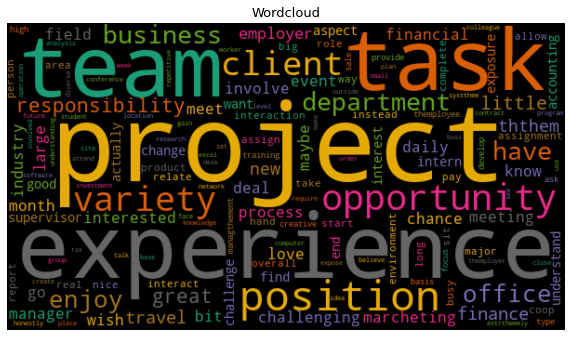

In [58]:
generate_wordcloud(data = df_dtm_1.sum(axis=0).to_dict(), title = "Wordcloud")

# Word frequency bar chart One-word

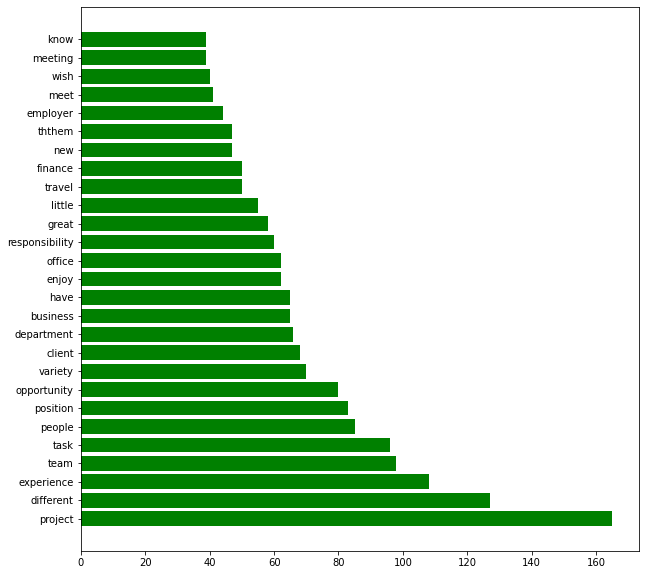

In [63]:
import matplotlib.pyplot as plt

# removing unnecessary words

word_freqs_1
banned = ["co", "lot", "op", "datum", "work", "need", "day", "give", "feel", "help", "able", "important", "ability","skill", "improve", "like", "well", "learn", "think"]

for keys in word_freqs_1.copy():
    if keys in banned:
        del word_freqs_1[keys]


plt.figure(figsize = (10, 10))
plt.barh(range(len(word_freqs_1)), word_freqs_1.values(),color='green')

plt.yticks(range(len(word_freqs_1)), word_freqs_1.keys())
plt.yticks(rotation = 0)


plt.show()

## Word Cloud two-word

In [64]:
def generate_wordcloud(data,title):
  wc = WordCloud(width=600, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()

In [65]:
#banned_column = ["co op", "need work" ]
#for i in df_dtm:
 #   if df_dtm[i].values in banned_column:
  #      df_dtm.drop(column, axis=1, inplace=True)

In [72]:
banned_column = ["co op", "co worker", "able work", "think job", "op experience", "able sit", "little bit", "work interesting", "get work", "interesting get", "enjoy work", "learn lot", "feel like", "need work", "like improve", "need learn", "skill need", "interesting able", "job interesting" ]
for i in banned_column:
    try:
        df_dtm.drop(i, axis=1, inplace = True)
    except:
        continue
        

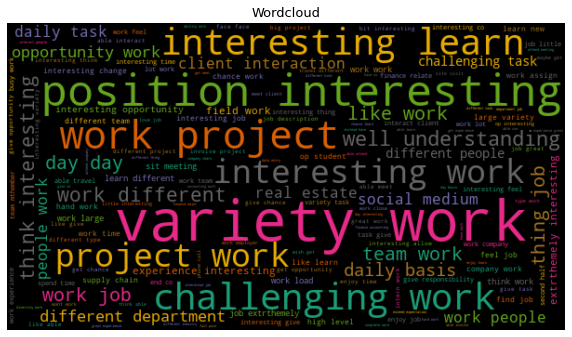

In [73]:
generate_wordcloud(data = df_dtm.sum(axis=0).to_dict(), title = "Wordcloud")

In [75]:
df_dtm.head()

,ability accomplish,ability ask,ability assist,ability create,ability different,ability directly,ability engage,ability experiment,ability implthement,ability involve,...,year intern,year want,year work,york philadelphia,young learn,young person,yvonne setheme,zone new,zone possibly,zone think
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Word frequency bar chart Two-word

In [79]:
word_freqs_2 = df_dtm.sum(axis=0).sort_values(ascending=False)[:20].to_dict()


word_freqs_2

{'variety work': 33,
 'position interesting': 18,
 'work project': 14,
 'well understanding': 13,
 'interesting work': 13,
 'project work': 13,
 'interesting learn': 13,
 'challenging work': 13,
 'think interesting': 12,
 'work different': 12,
 'day day': 11,
 'like work': 11,
 'team work': 11,
 'thing job': 11,
 'work job': 11,
 'opportunity work': 10,
 'different department': 10,
 'daily basis': 10,
 'work people': 9,
 'real estate': 9}

In [80]:
word_freqs_1
banned = ["co op", "day day", "opportunity work", "co worker", "able work", "think job", "op experience", "able sit", "little bit", "work interesting", "get work", "interesting get", "enjoy work", "learn lot", "feel like", "need work", "like improve", "need learn", "skill need", "interesting able", "job interesting","important skill","need develop", "think need", "prepare position", "like develop", "" "co op", "skill co", "skill important", "need improve" "op communication", "datum analysis", "co worker", "people skill", "ability","skill","co op", "need work", "like improve", "need improve", "need learn", "skill need"]

for keys in word_freqs_2.copy():
    if keys in banned:
        del word_freqs_2[keys]

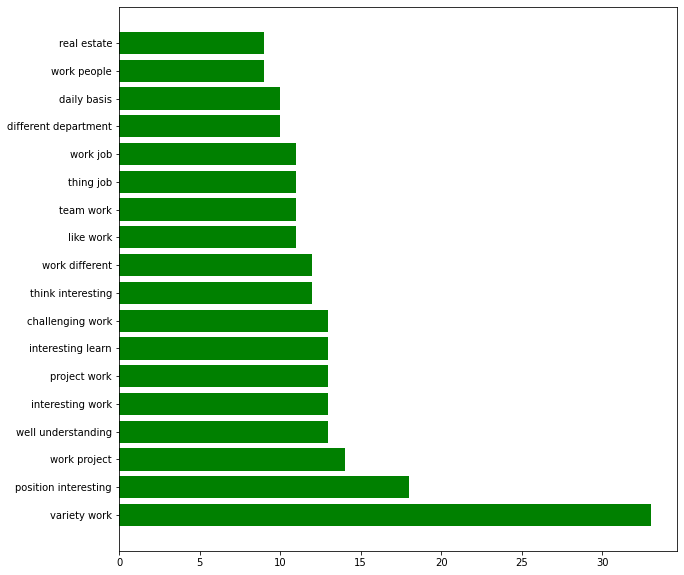

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
plt.barh(range(len(word_freqs_2)), word_freqs_2.values(),color='green')

plt.yticks(range(len(word_freqs_2)), word_freqs_2.keys())
plt.yticks(rotation = 0)
plt.show()